In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense, Input, Activation, Flatten, Reshape, Dropout, UpSampling2D, AveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2DTranspose, Reshape, Conv2D, MaxPooling2D

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


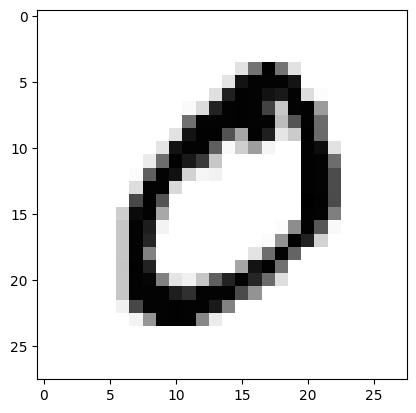

In [3]:
plt.imshow(X_train[1], cmap='Greys')

In [4]:
# Normalizar los datos a un rango de [-1, 1]
X_train=X_train/127.5 - 1

In [5]:
# Ajustar la forma de entrada
X_train = np.expand_dims(X_train, axis=3)

In [6]:
X_train.shape

(60000, 28, 28, 1)

##***AUTOENCODER***
1. Arquitectura del Autoencoder:\
Encoder: Convierte la entrada (imágenes MNIST) en una representación de menor dimensionalidad.\
Decoder: Reconstruye la entrada original a partir de la representación codificada.
2. Capas del Modelo:\
Encoder:
Capa de entrada (para imagenes aplanadas).
Capas densas con funciones de activación ReLU para reducir la dimensionalidad.\
Decoder:
Capas densas con funciones de activación ReLU para reconstruir la entrada.

In [7]:
from tensorflow.keras import regularizers

x_train = X_train[:100].astype('float32')
x_test = X_test[:100].astype('float32')

# Aplanar imágenes
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Definir el modelo
input_size = X_train.shape[1]*X_train.shape[2]

input_img = Input(shape=(input_size,))
encoded = Dense(28, activation='relu', activity_regularizer=regularizers.l2(1e-7))(input_img)
decoded = Dense(input_size, activation='sigmoid', activity_regularizer=regularizers.l2(1e-7))(encoded)

autoencoder = Model(input_img, decoded)

# Compilar el modelo
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

# Entrenar el modelo
autoencoder.fit(x_train, x_train, epochs=5, batch_size=32, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/5
4/4 [==============================] - 8s 66ms/step - loss: 0.6668 - val_loss: 35.9375
Epoch 2/5
4/4 [==============================] - 0s 14ms/step - loss: 0.4684 - val_loss: 79.3724
Epoch 3/5
4/4 [==============================] - 0s 17ms/step - loss: 0.0134 - val_loss: 99.4450
Epoch 4/5
4/4 [==============================] - 0s 18ms/step - loss: -0.7374 - val_loss: 109.7392
Epoch 5/5
4/4 [==============================] - 0s 14ms/step - loss: -1.7979 - val_loss: 111.6595


4/4 [==============================] - 0s 3ms/step


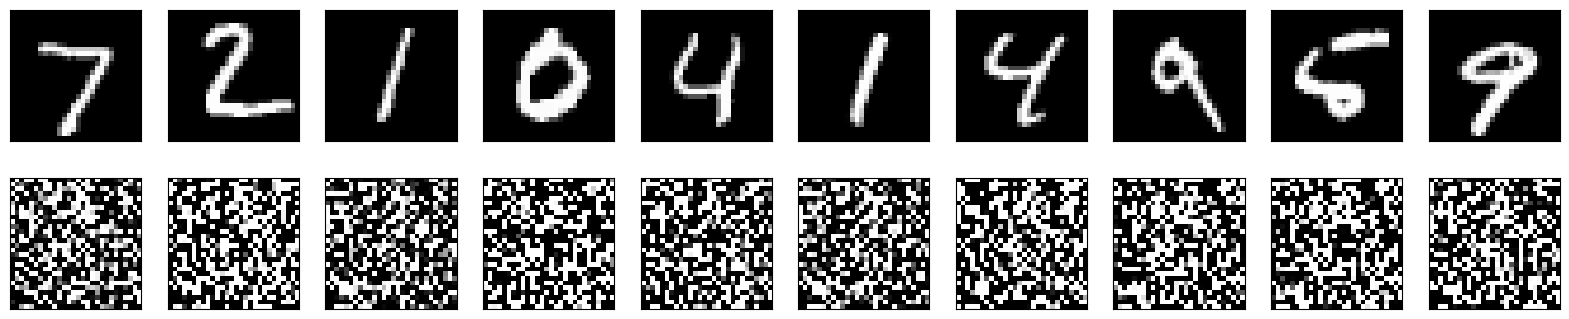

In [8]:
# Obtener las reconstrucciones
decoded_imgs = autoencoder.predict(x_test)

# Visualizar algunas imágenes originales y reconstruidas

n = 10  # Número de imágenes a mostrar
plt.figure(figsize=(20, 4))
for i in range(n):
    # Imagen original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Imagen reconstruida
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

##***GANS***

Las Redes Generativas Adversarias (GANs) son un tipo de modelo generativo en el campo del aprendizaje profundo. La idea fundamental detrás de las GANs es entrenar dos redes neurales simultáneamente: un generador y un discriminador.

**Generador (Generator):** Su objetivo es crear datos que sean indistinguibles de los datos reales. Toma una entrada aleatoria (ruido) y genera muestras que se parecen a las que se encuentran en el conjunto de datos de entrenamiento.

**Discriminador (Discriminator):** Su función es distinguir entre datos reales y datos generados por el generador. A medida que se entrena, intenta mejorar en la tarea de diferenciar entre datos genuinos y falsificados.

**Proceso de Entrenamiento:**

El generador y el discriminador se involucran en un juego de competencia mutua, conocido como el juego del minmax. Aquí, el generador intenta mejorar continuamente para engañar al discriminador, generando datos más realistas. Al mismo tiempo, el discriminador busca mejorar su capacidad para diferenciar entre datos genuinos y generados. Este proceso iterativo continúa hasta que el generador produce datos que son prácticamente indistinguibles de los datos reales.

**Función de Pérdida:**

La función de pérdida de las GANs se basa en la competencia adversarial entre el generador y el discriminador. Buscamos un equilibrio donde el generador sea lo suficientemente competente como para engañar al discriminador, y este último sea lo suficientemente competente como para no ser engañado fácilmente.

***COMPARACION DE GANS CON AUTOENCODERS***

Tanto GANs como autoencoders son modelos generativos que pueden aprender representaciones de datos.Sin embargo ,mientras que los autoencoders buscan reconstruir la entrada, las GANs generan nuevos datos. Las GANs son especialmente útiles para generar muestras realistas y diversas.

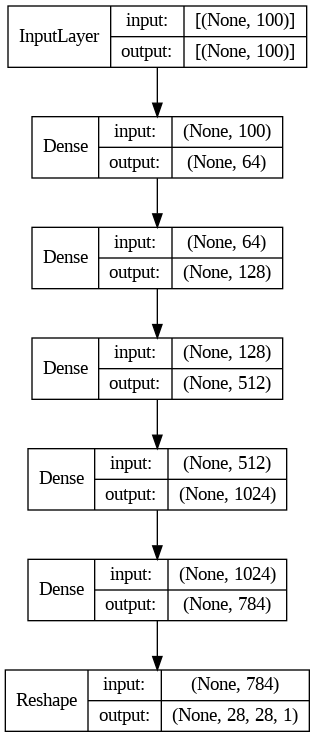

In [9]:
#GENERADOR Y DISCRIMINADOR.

def create_discriminator():
    # Entrada para el discriminador (28x28x1)
    input=Input(shape=(28,28,1))

    # Aplanar entrada
    x=Flatten()(input)

     # Capas densas con activación ReLU
    x=Dense(512, activation='relu', activity_regularizer=regularizers.l2(1e-7))(x)
    x=Dense(128, activation='relu', activity_regularizer=regularizers.l2(1e-7))(x)
    x=Dense(64, activation='relu', activity_regularizer=regularizers.l2(1e-7))(x)

    # Capa de salida con activación sigmoide
    output=Dense(1, activation='sigmoid')(x)

    # Crear el modelo del discriminador
    discriminator=Model(input,output)


    return discriminator


discriminator=create_discriminator()

def create_generator():
    # Entrada para el generador (vector de ruido)
    input = Input(shape=(100))

    # Capas densas con activación ReLU
    x=Dense(64, activation='relu', activity_regularizer=regularizers.l2(1e-7))(input)
    x=Dense(128, activation='relu', activity_regularizer=regularizers.l2(1e-7))(x)
    x=Dense(512, activation='relu',activity_regularizer=regularizers.l2(1e-7))(x)
    x=Dense(1024, activation='relu', activity_regularizer=regularizers.l2(1e-7))(x)

    x=Dense(28*28, activation='tanh')(x)
    output=Reshape((28,28,1))(x)


    # Crear el modelo del generador
    generator = Model(input, output)

    return generator

generator=create_generator()
plot_model(generator, show_shapes=True, show_layer_names=False)

In [10]:
# Configuración del discriminador
discriminator.compile(loss='binary_crossentropy', metrics=['accuracy'])

# Establecer el discriminador como no entrenable
discriminator.trainable = False

# Definir la entrada para el modelo generador
z = Input(shape=(100,))

# Generar una imagen utilizando el generador
img = generator(z)

# Determinar la validez de la imagen generada utilizando el discriminador
validity = discriminator(img)

# Crear el modelo combinado (generador + discriminador)
combined = Model(z, validity)

# Compilar el modelo combinado con la función de pérdida binary_crossentropy
combined.compile(loss='binary_crossentropy')

In [11]:
#PROCESO DE ENTRENAMIENTO

def sample_imgs(gen_imgs, imgs):
  # Configuración del tamaño de la figura
  plt.rcParams['figure.figsize'] = [15, 5]

  # Crear una figura con 2 filas y 5 columnas de subgráficos
  fig, axs = plt.subplots(2, 5)

  # Mostrar imágenes generadas en la primera fila
  for i in range(5):
      axs[0, i].imshow(gen_imgs[i, :, :, 0], cmap='Greys')
      axs[0, i].axis('off')

  # Mostrar imágenes reales en la segunda fila
  for i in range(5):
      axs[1, i].imshow(imgs[i, :, :, 0], cmap='Greys')
      axs[1, i].axis('off')
  plt.show()
  plt.close()

In [12]:
def train(X_train, generator, discriminator, combined, epochs, batch_size=16, sample_interval=100):
    # Etiquetas para el discriminador (clases válidas y falsas)
    valid = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    # Bucle a través de las épocas de entrenamiento
    for epoch in range(epochs):
        print('Epoch:', epoch)

        # Bucle a través de los lotes de datos
        for batch in range(int(len(X_train) / batch_size)):
            # Generar ruido aleatorio para el generador
            noise = np.random.normal(0, 1, (batch_size, 100))

            # Generar imágenes falsas con el generador
            gen_imgs = generator.predict(noise)

            # Seleccionar un lote de imágenes reales
            imgs = X_train[batch * batch_size: (batch + 1) * batch_size]

            # Entrenar al discriminador en imágenes reales y falsas
            d_loss_real = discriminator.train_on_batch(imgs, valid)
            d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)

            # Calcular la pérdida total del discriminador
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # Generar nuevo ruido para el entrenamiento del generador
            noise = np.random.normal(0, 1, (batch_size, 100))

            # Entrenar al generador a engañar al discriminador
            g_loss = combined.train_on_batch(noise, valid)

            # Imprimir métricas de pérdida y precisión
            if batch % 50 == 0:
                print('D loss:', d_loss[0])
                print('D accuracy:', d_loss[1])
                print('G loss:', g_loss)
                print('\n')

            # Mostrar imágenes generadas a intervalos específicos
            if batch % sample_interval == 0:
                sample_imgs(gen_imgs, imgs)

Epoch: 0
16/16 [==============================] - 0s 2ms/step
D loss: 0.867319792509079
D accuracy: 0.08799999952316284
G loss: 0.7770943641662598




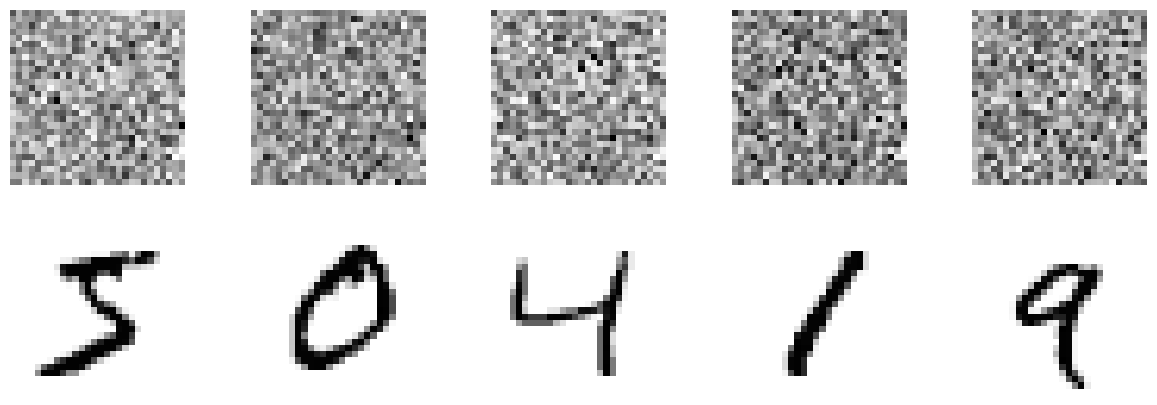

16/16 [==============================] - 0s 2ms/step
D loss: 1.533678449690342
D accuracy: 0.49900001287460327
G loss: 0.31121277809143066


16/16 [==============================] - 0s 2ms/step
D loss: 0.5351320928893983
D accuracy: 0.5020000000949949
G loss: 1.8459861278533936


16/16 [==============================] - 0s 3ms/step
Epoch: 1
16/16 [==============================] - 0s 2ms/step
D loss: 0.3206600248813629
D accuracy: 1.0
G loss: 1.2180155515670776




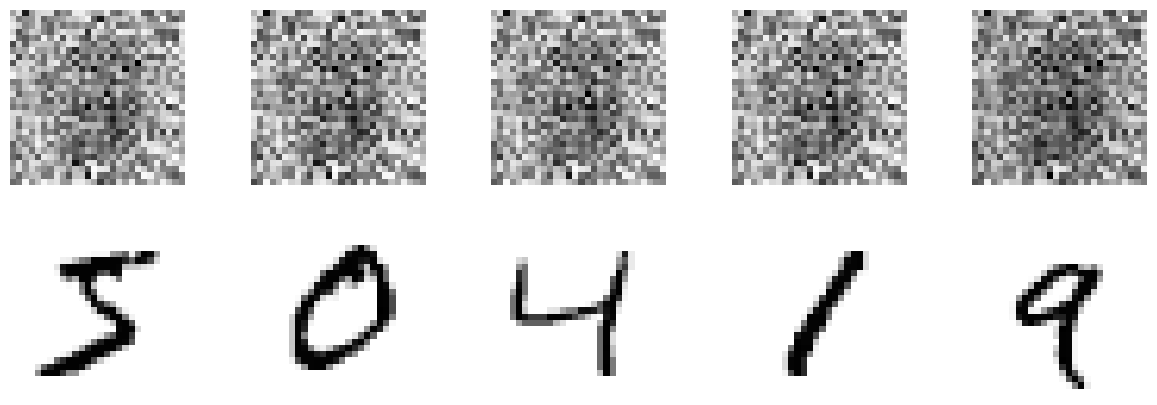

16/16 [==============================] - 0s 3ms/step
D loss: 0.31493403762578964
D accuracy: 0.9830000102519989
G loss: 1.4524662494659424


16/16 [==============================] - 0s 2ms/step
D loss: 0.5874529971042648
D accuracy: 0.5099999997764826
G loss: 1.4366241693496704


16/16 [==============================] - 0s 2ms/step
Epoch: 2
16/16 [==============================] - 0s 2ms/step
D loss: 0.3779459223151207
D accuracy: 0.8549999892711639
G loss: 1.5115970373153687




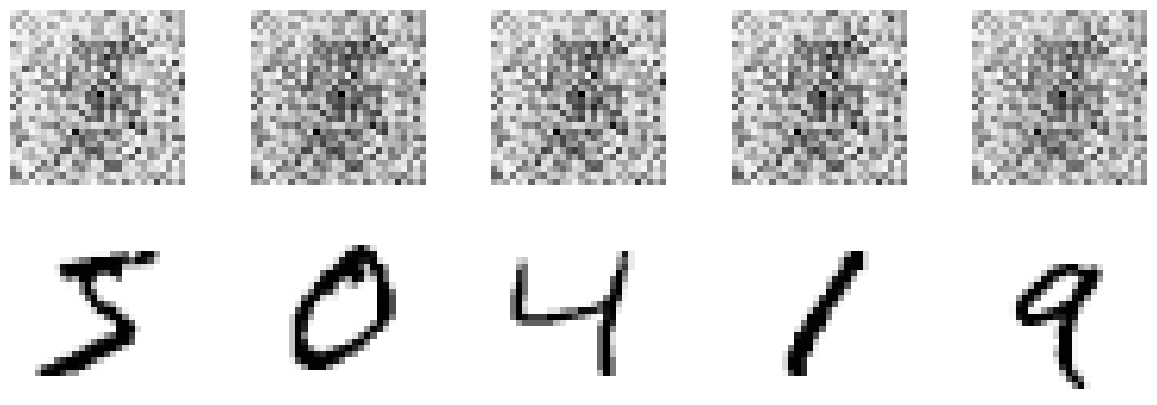

16/16 [==============================] - 0s 2ms/step
D loss: 0.07123264856636524
D accuracy: 1.0
G loss: 2.9430582523345947


16/16 [==============================] - 0s 3ms/step
D loss: 0.11014320189133286
D accuracy: 1.0
G loss: 4.046946048736572


16/16 [==============================] - 0s 2ms/step
Epoch: 3
16/16 [==============================] - 0s 2ms/step
D loss: 0.1508210115134716
D accuracy: 1.0
G loss: 3.0516555309295654




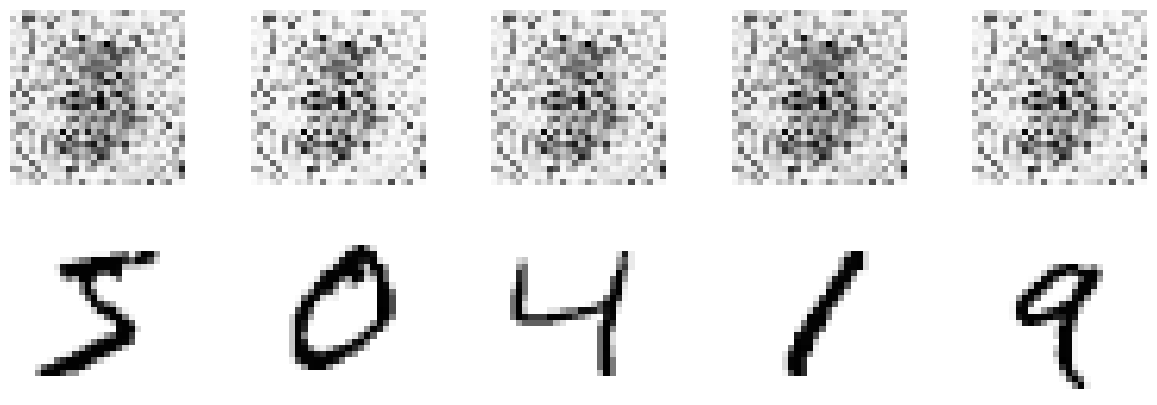

16/16 [==============================] - 0s 2ms/step
D loss: 0.5864571183919907
D accuracy: 0.5850000008940697
G loss: 2.13023042678833


16/16 [==============================] - 0s 2ms/step
D loss: 0.06972922902787104
D accuracy: 1.0
G loss: 6.17933464050293


16/16 [==============================] - 0s 2ms/step
Epoch: 4
16/16 [==============================] - 0s 2ms/step
D loss: 1.903039038181305
D accuracy: 0.16300000436604023
G loss: 3.019252061843872




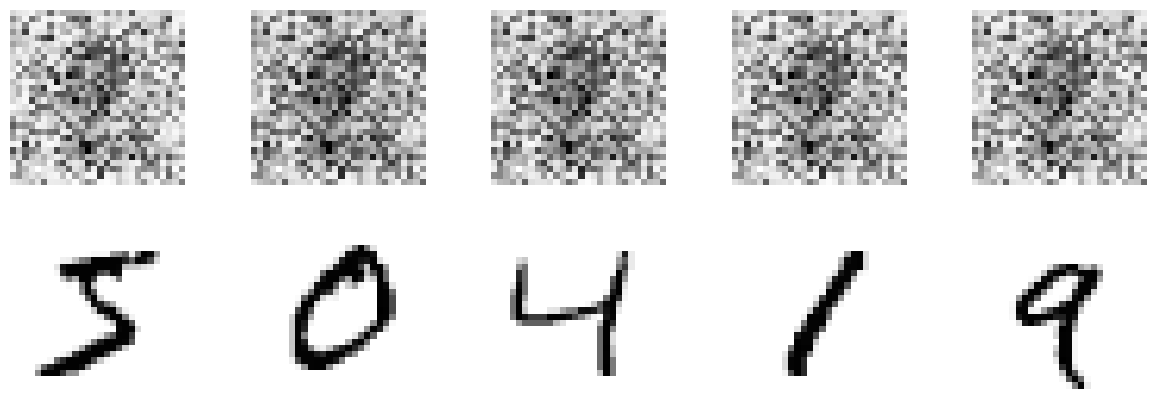

16/16 [==============================] - 0s 2ms/step
D loss: 0.025405929423868656
D accuracy: 1.0
G loss: 3.5681419372558594


16/16 [==============================] - 0s 2ms/step
D loss: 0.2782622277736664
D accuracy: 0.9510000050067902
G loss: 2.722156286239624


16/16 [==============================] - 0s 3ms/step
Epoch: 5
16/16 [==============================] - 0s 2ms/step
D loss: 0.5750663802027702
D accuracy: 0.757999986410141
G loss: 2.4633452892303467




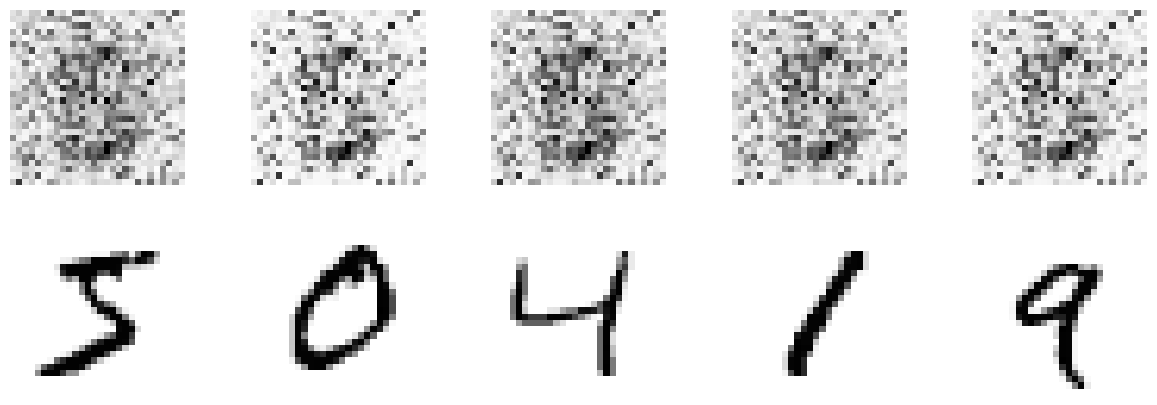

16/16 [==============================] - 0s 2ms/step
D loss: 0.09069453540723771
D accuracy: 1.0
G loss: 4.276329040527344


16/16 [==============================] - 0s 2ms/step
D loss: 0.1077216356061399
D accuracy: 1.0
G loss: 2.4367339611053467


16/16 [==============================] - 0s 2ms/step
Epoch: 6
16/16 [==============================] - 0s 2ms/step
D loss: 0.04428176395595074
D accuracy: 1.0
G loss: 3.184039354324341




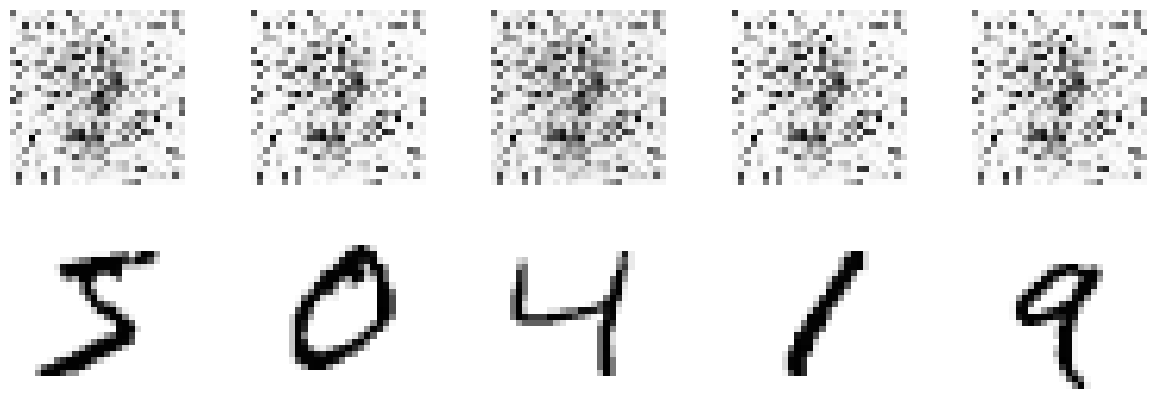

16/16 [==============================] - 0s 2ms/step
D loss: 0.4362063333392143
D accuracy: 0.828000009059906
G loss: 3.842010259628296


16/16 [==============================] - 0s 3ms/step
D loss: 0.1351668732240796
D accuracy: 1.0
G loss: 2.9759116172790527


16/16 [==============================] - 0s 3ms/step
Epoch: 7
16/16 [==============================] - 0s 2ms/step
D loss: 0.01620337087661028
D accuracy: 1.0
G loss: 4.37288236618042




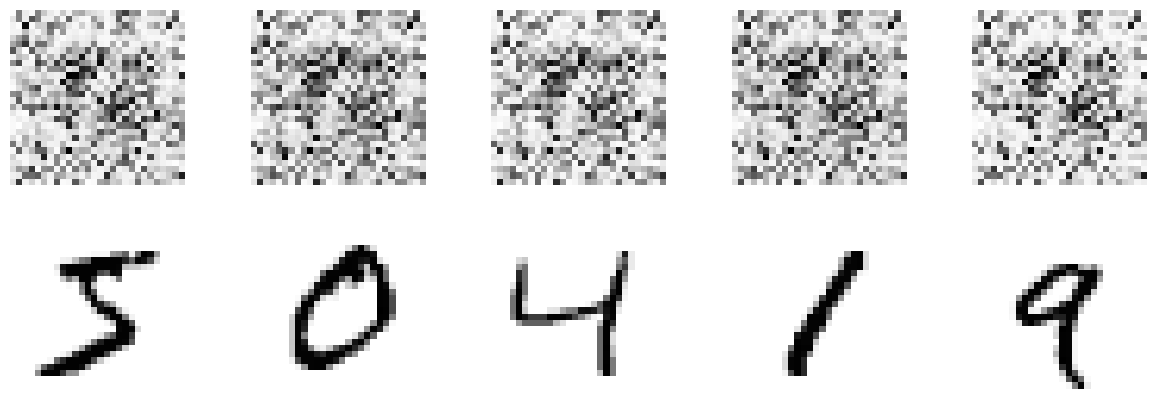

16/16 [==============================] - 0s 2ms/step
D loss: 0.5738703906536102
D accuracy: 0.7060000002384186
G loss: 4.918211460113525


16/16 [==============================] - 0s 2ms/step
D loss: 0.05281825177371502
D accuracy: 0.9880000054836273
G loss: 3.8590331077575684


16/16 [==============================] - 0s 2ms/step
Epoch: 8
16/16 [==============================] - 0s 2ms/step
D loss: 1.1888357996940613
D accuracy: 0.09100000001490116
G loss: 2.930891990661621




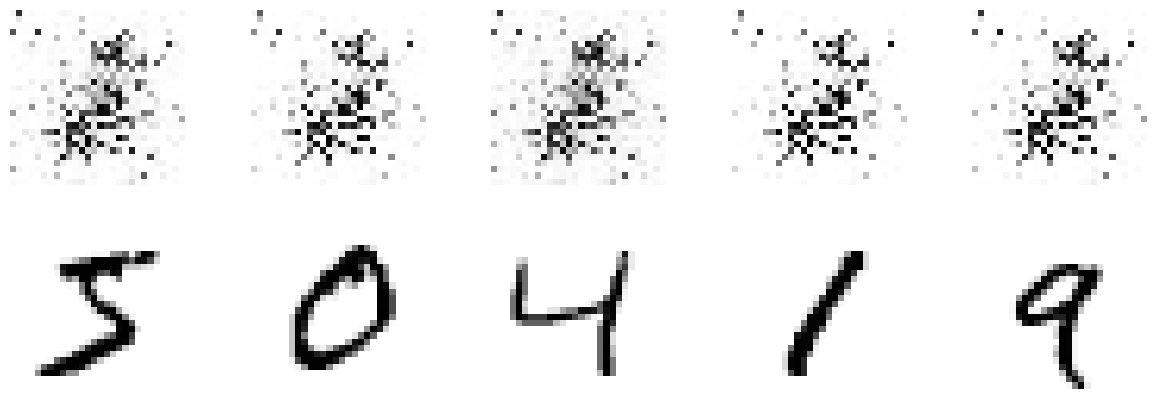

16/16 [==============================] - 0s 2ms/step
D loss: 0.09196209162473679
D accuracy: 0.9970000088214874
G loss: 3.239226818084717


16/16 [==============================] - 0s 2ms/step
D loss: 0.6354283541440964
D accuracy: 0.7260000109672546
G loss: 4.633242607116699


16/16 [==============================] - 0s 3ms/step
Epoch: 9
16/16 [==============================] - 0s 3ms/step
D loss: 0.035014830995351076
D accuracy: 0.9880000054836273
G loss: 5.2057719230651855




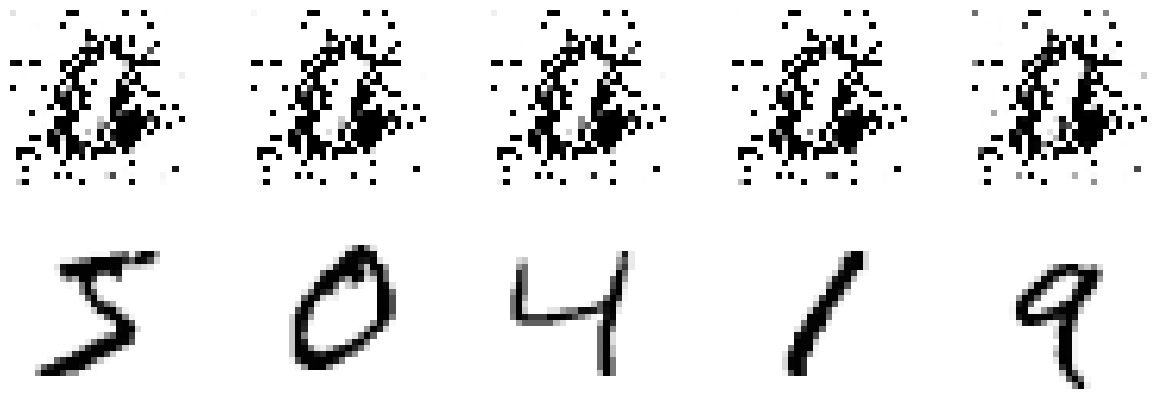

16/16 [==============================] - 0s 2ms/step
D loss: 0.022462511551566422
D accuracy: 0.9939999878406525
G loss: 6.285004138946533


16/16 [==============================] - 0s 2ms/step
D loss: 0.8442006949335337
D accuracy: 0.6280000060796738
G loss: 11.51729679107666


16/16 [==============================] - 0s 2ms/step


In [13]:
train(X_train, generator, discriminator, combined , epochs=10, batch_size=500, sample_interval=1000)

## ***PRINCIPALES PROBLEMAS DE LAS GANS Y COMO SUPERARLOS***
### Identificación de los problemas

1. **Colapso del Modo (Mode Collapse):**
   - *Problema:* El generador produce repetidamente una gama limitada de muestras, ignorando la diversidad del conjunto de datos.
   - *Causa:* La competencia adversarial puede llevar a que el generador se enfoque en producir solo algunas muestras que engañen al discriminador.
   - *Identificación:* La variabilidad en las muestras generadas es muy baja.

2. **Inestabilidad del Entrenamiento:**
   - *Problema:* La GAN puede ser difícil de entrenar y puede ser inestable, con oscilaciones en el rendimiento.
   - *Causa:* La optimización no converge fácilmente y puede haber problemas con el equilibrio del juego adversarial.
   - *Identificación:* Pérdidas oscilantes y resultados inconsistentes durante el entrenamiento.

3. **Modo del Discriminador Colapsado:**
   - *Problema:* El discriminador puede volverse demasiado competente y "colapsar", clasificando todo como real o falso.
   - *Causa:* El discriminador se vuelve demasiado fuerte y domina al generador.
   - *Identificación:* Pérdida del generador que no mejora y precisión del discriminador muy alta.

4. **Explotación de Vulnerabilidades en el Discriminador:**
   - *Problema:* El generador encuentra y explota debilidades específicas en el discriminador para generar muestras engañosas.
   - *Causa:* La estructura del discriminador puede tener vulnerabilidades que el generador aprende a explotar.
   - *Identificación:* Generación de muestras que parecen realistas pero son fácilmente identificadas por humanos.

5. **Dificultad en la Elección de Hiperparámetros:**
   - *Problema:* La elección de tasas de aprendizaje, tamaño del lote y dimensiones de capas puede ser crítica y difícil de ajustar.
   - *Causa:* Sensibilidad a la configuración de hiperparámetros.
   - *Identificación:* Rendimiento insatisfactorio con diversas configuraciones.

### Propuestas de Soluciones

1. **Regularización y Normalización:**
   - *Solución:* Aplicar técnicas de regularización como la penalización de pesos y normalización, como la normalización por lotes, para prevenir el colapso del modo.

2. **Diversidad en el Conjunto de Datos de Entrada:**
   - *Solución:* Asegurarse de que el conjunto de datos de entrada sea lo suficientemente diverso para evitar que el generador se enfoque en muestras específicas.

3. **Optimización Gradual:**
   - *Solución:* Iniciar con tasas de aprendizaje más bajas y aumentarlas gradualmente durante el entrenamiento para abordar la inestabilidad.

4. **Arquitecturas Avanzadas:**
   - *Solución:* Utilizar arquitecturas más avanzadas como DCGANs (Redes Generativas Adversarias Convolucionales) para estabilizar el entrenamiento y mejorar la calidad de las muestras generadas.

5. **Detección y Prevención de Modo Colapsado:**
   - *Solución:* Implementar técnicas para detectar y prevenir el colapso del modo, como el monitoreo de la diversidad de las muestras generadas.

6. **Entrenamiento Semi-Supervisado:**
   - *Solución:* Incorporar datos supervisados y técnicas semi-supervisadas para mejorar la capacidad del discriminador y evitar el colapso.

7. **Reducción de la Sensibilidad a Hiperparámetros:**
   - *Solución:* Experimentar con técnicas de ajuste automático de hiperparámetros y métodos de búsqueda, como la optimización bayesiana.

8. **Generación de Muestras de Alta Calidad:**
   - *Solución:* Evaluar la calidad de las muestras generadas utilizando métricas específicas y técnicas de evaluación perceptual.

9. **Entrenamiento Ganancia-Balanceado:**
   - *Solución:* Utilizar técnicas como WGAN (Redes Generativas Adversarias Wasserstein) que ayudan a mitigar problemas asociados con la divergencia de Jensen-Shannon.

10. **Mejoras Continuas:**
    - *Solución:* Estar al tanto de las investigaciones y avances en el campo de las GANs, ya que la tecnología está en constante evolución.

Estas propuestas de soluciones abordan los problemas comunes asociados con las GANs y buscan mejorar la estabilidad y la calidad de las muestras generadas.


##***MODELO AVANZADO DCGAN***
Un DCGAN es una variante específica de la arquitectura GAN que utiliza capas convolucionales profundas en lugar de capas totalmente conectadas. La introducción de capas convolucionales mejora significativamente la capacidad del generador para generar imágenes realistas, especialmente en el contexto de datos de imágenes.

Aquí hay algunas diferencias clave entre un modelo GAN estándar y un DCGAN:

1. **Capas Convolucionales vs. Capas Densas:**
   - En un GAN estándar, el generador y el discriminador a menudo están compuestos por capas totalmente conectadas (densas).
   - En un DCGAN, se utilizan capas convolucionales en lugar de capas totalmente conectadas, lo que permite aprender características espaciales y jerarquías en datos de imágenes.

2. **Arquitectura más Profunda:**
   - Los DCGAN tienden a tener arquitecturas más profundas en comparación con los GAN estándar. Esto significa que tienen más capas convolucionales y transconvolucionales, lo que permite aprender representaciones más complejas.

3. **Batch Normalization:**
   - Los DCGAN suelen incorporar técnicas como la normalización por lotes (Batch Normalization) para estabilizar y acelerar el entrenamiento.

4. **Arquitectura Específica:**
   - Un DCGAN sigue una arquitectura específica que ha demostrado ser eficaz para la generación de imágenes realistas. Esto incluye capas convolucionales transpuestas en el generador y capas convolucionales en el discriminador.

5. **Aplicación a Datos de Imágenes:**
   - Los DCGAN son especialmente diseñados para trabajar con datos de imágenes y han demostrado ser muy exitosos en la generación de imágenes realistas, como rostros humanos.

En resumen, un DCGAN es una mejora específica de la arquitectura GAN para tareas de generación de imágenes mediante el uso de capas convolucionales y otras técnicas específicas para estabilizar y mejorar el entrenamiento en este contexto.

<IPython.core.display.Image object>


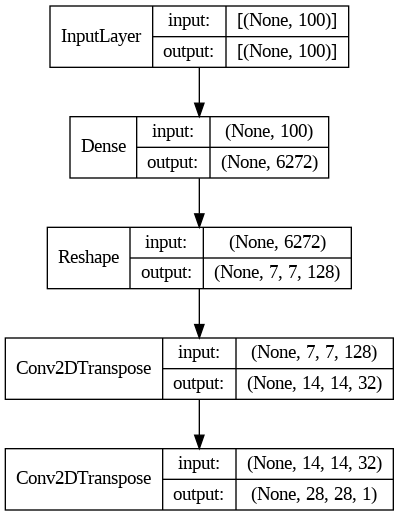

In [14]:
def create_discriminator_dc():
    # Entrada para el discriminador (28x28x1)
    input = Input(shape=(28, 28, 1))

    # Capas convolucionales con activación ReLU
    x = Conv2D(64, (5, 5), strides=(2, 2), padding='same', activation='relu')(input)

    # Aplanar la salida
    x = Flatten()(x)

    # Capas densas con activación ReLU
    x = Dense(64, activation='relu')(x)

    # Capa de salida con activación sigmoide
    output = Dense(1, activation='sigmoid')(x)

    # Crear el modelo del discriminador
    discriminator = Model(input, output)

    return discriminator


discriminator_dc=create_discriminator_dc()
print(plot_model(discriminator_dc, show_shapes=True, show_layer_names=False))
def create_generator_dc():
    # Entrada para el generador (vector de ruido)
    input = Input(shape=(100))

    # Capas densas con activación ReLU
    x = Dense(7 * 7 * 128, activation='relu')(input)
    x = Reshape((7, 7, 128))(x)

    # Capas de convolución transpuesta con activación ReLU
    x = Conv2DTranspose(32, (5, 5), strides=(2, 2), padding='same', activation='relu')(x)
    x = Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', activation='tanh')(x)

    # Crear el modelo del generador
    generator = Model(input, x)

    return generator

generator_dc=create_generator_dc()
plot_model(generator_dc, show_shapes=True, show_layer_names=False)

In [15]:
# Configuración del discriminador
discriminator_dc.compile(loss='binary_crossentropy', metrics=['accuracy'])

# Establecer el discriminador como no entrenable
discriminator_dc.trainable = False

# Definir la entrada para el modelo generador
z_dc = Input(shape=(100,))

# Generar una imagen utilizando el generador
img_dc = generator_dc(z_dc)

# Determinar la validez de la imagen generada utilizando el discriminador
validity_dc = discriminator_dc(img_dc)

# Crear el modelo combinado (generador + discriminador)
combined_dc = Model(z_dc, validity_dc)

# Compilar el modelo combinado con la función de pérdida binary_crossentropy
combined_dc.compile(loss='binary_crossentropy')

Epoch: 0
16/16 [==============================] - 4s 4ms/step
D loss: 0.7403483986854553
D accuracy: 0.4690000116825104
G loss: 0.659133791923523




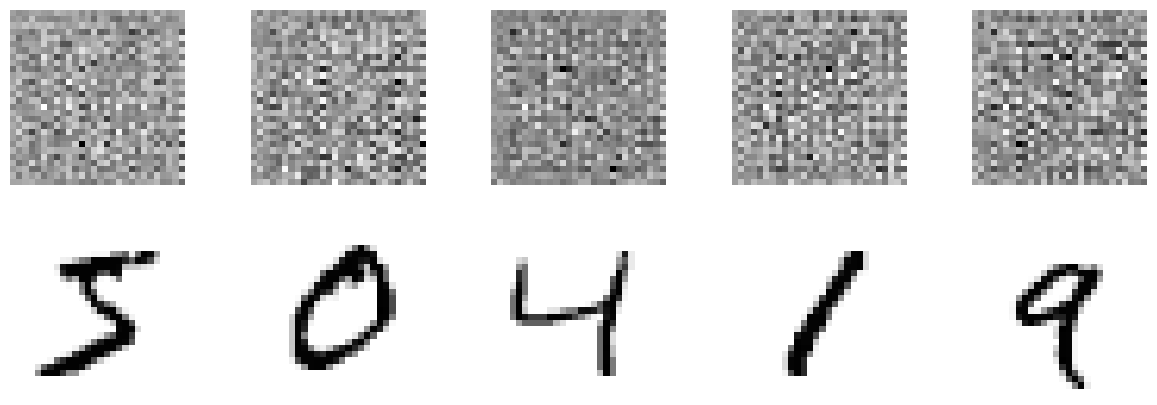

16/16 [==============================] - 0s 2ms/step
D loss: 0.011178264945556293
D accuracy: 1.0
G loss: 3.9642090797424316


16/16 [==============================] - 0s 2ms/step
D loss: 0.05593143869191408
D accuracy: 1.0
G loss: 3.5879390239715576


16/16 [==============================] - 0s 2ms/step
Epoch: 1
16/16 [==============================] - 0s 2ms/step
D loss: 1.3842558860778809
D accuracy: 0.3489999994635582
G loss: 6.103938579559326




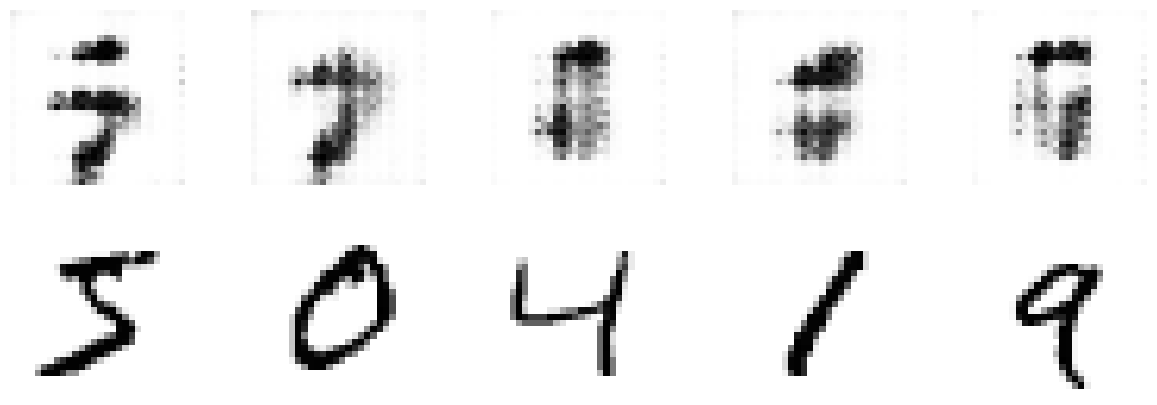

16/16 [==============================] - 0s 2ms/step
D loss: 1.299009382724762
D accuracy: 0.2719999924302101
G loss: 2.356804609298706


16/16 [==============================] - 0s 2ms/step
D loss: 0.9663811922073364
D accuracy: 0.3059999942779541
G loss: 1.420296549797058


16/16 [==============================] - 0s 2ms/step
Epoch: 2
16/16 [==============================] - 0s 2ms/step
D loss: 1.0386966466903687
D accuracy: 0.2370000034570694
G loss: 1.5184284448623657




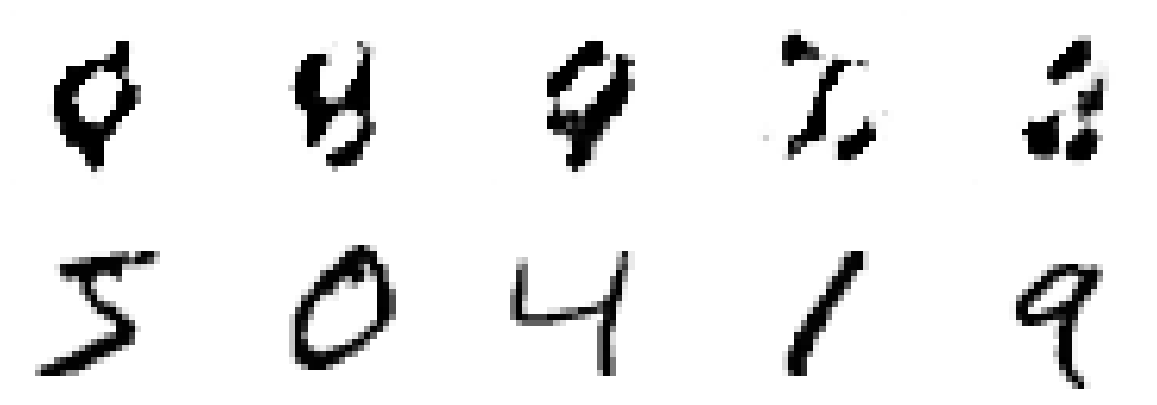

16/16 [==============================] - 0s 3ms/step
D loss: 0.7578807473182678
D accuracy: 0.4740000069141388
G loss: 1.2553373575210571


16/16 [==============================] - 0s 3ms/step
D loss: 0.6729076206684113
D accuracy: 0.5980000197887421
G loss: 1.1033704280853271


16/16 [==============================] - 0s 2ms/step
Epoch: 3
16/16 [==============================] - 0s 3ms/step
D loss: 0.7132512629032135
D accuracy: 0.5309999883174896
G loss: 1.2782509326934814




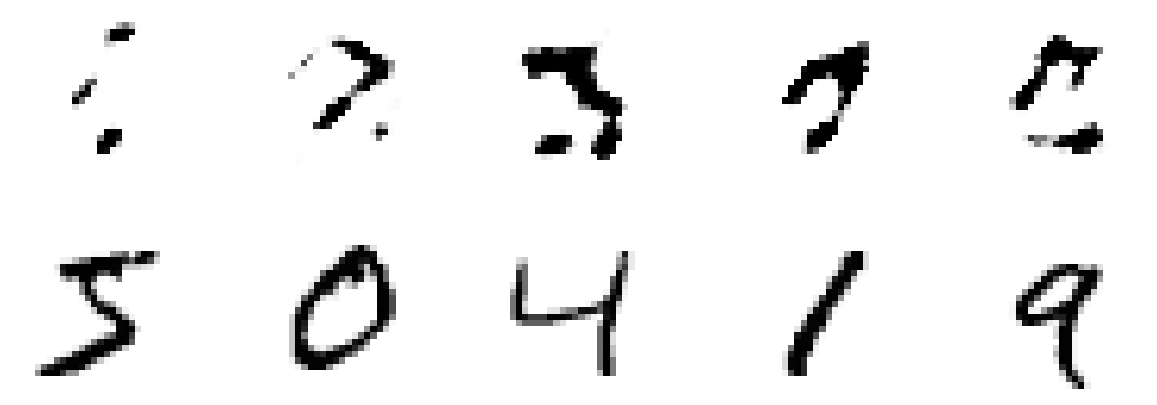

16/16 [==============================] - 0s 2ms/step
D loss: 0.7317198514938354
D accuracy: 0.4919999837875366
G loss: 1.180171251296997


16/16 [==============================] - 0s 2ms/step
D loss: 0.6959904432296753
D accuracy: 0.550000011920929
G loss: 1.073417067527771


16/16 [==============================] - 0s 2ms/step
Epoch: 4
16/16 [==============================] - 0s 2ms/step
D loss: 0.7293839454650879
D accuracy: 0.4700000137090683
G loss: 1.2529553174972534




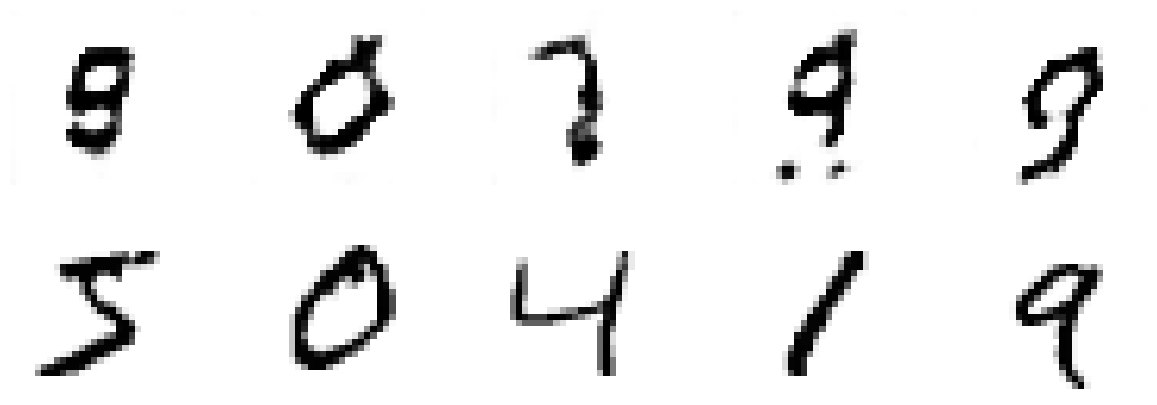

16/16 [==============================] - 0s 2ms/step
D loss: 0.7268596887588501
D accuracy: 0.47700001299381256
G loss: 1.0421454906463623


16/16 [==============================] - 0s 3ms/step
D loss: 0.6779742538928986
D accuracy: 0.5659999847412109
G loss: 0.9836729764938354


16/16 [==============================] - 0s 2ms/step
Epoch: 5
16/16 [==============================] - 0s 2ms/step
D loss: 0.6781828701496124
D accuracy: 0.5609999895095825
G loss: 1.05928635597229




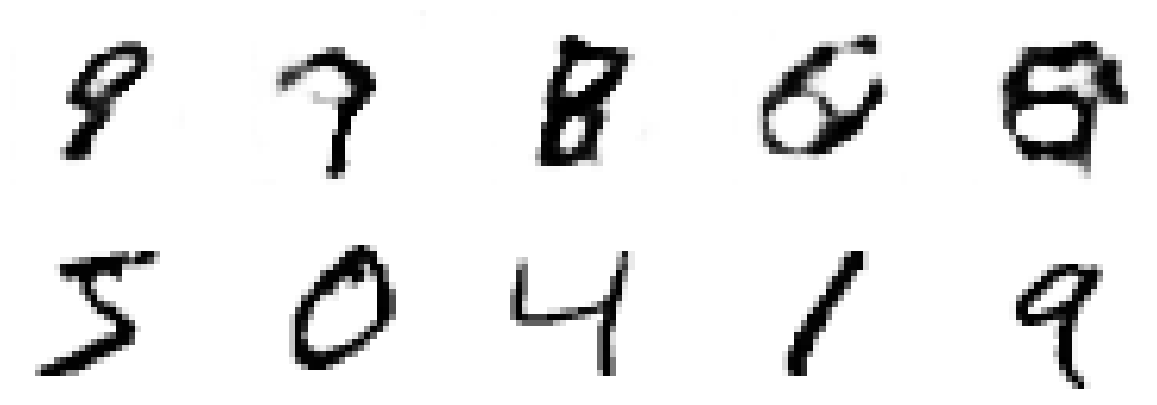

16/16 [==============================] - 0s 2ms/step
D loss: 0.679091602563858
D accuracy: 0.5520000010728836
G loss: 0.9679849743843079


16/16 [==============================] - 0s 2ms/step
D loss: 0.6485223472118378
D accuracy: 0.6310000121593475
G loss: 0.9723263382911682


16/16 [==============================] - 0s 2ms/step
Epoch: 6
16/16 [==============================] - 0s 2ms/step
D loss: 0.7125018239021301
D accuracy: 0.5090000182390213
G loss: 1.0570785999298096




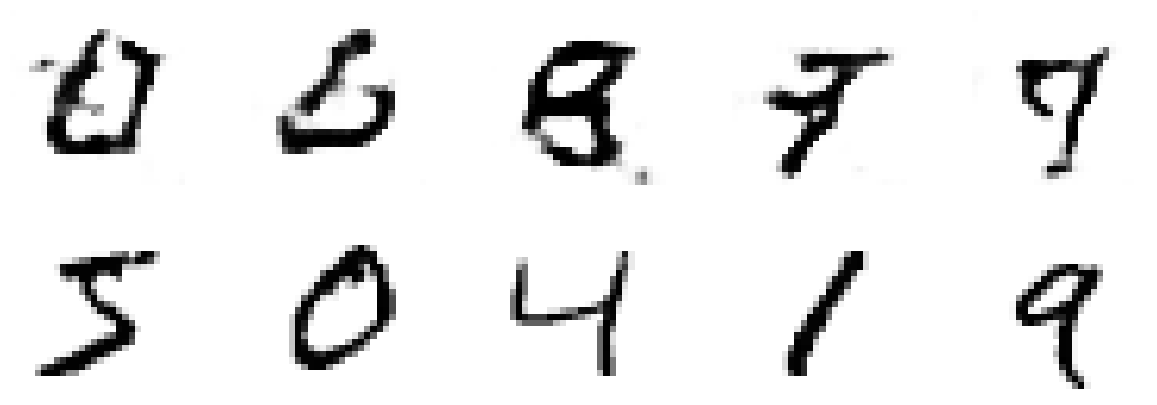

16/16 [==============================] - 0s 2ms/step
D loss: 0.6391603946685791
D accuracy: 0.6299999952316284
G loss: 1.001353144645691


16/16 [==============================] - 0s 3ms/step
D loss: 0.6338720917701721
D accuracy: 0.6500000059604645
G loss: 1.007590889930725


16/16 [==============================] - 0s 2ms/step
Epoch: 7
16/16 [==============================] - 0s 2ms/step
D loss: 0.62428417801857
D accuracy: 0.6680000126361847
G loss: 1.0629514455795288




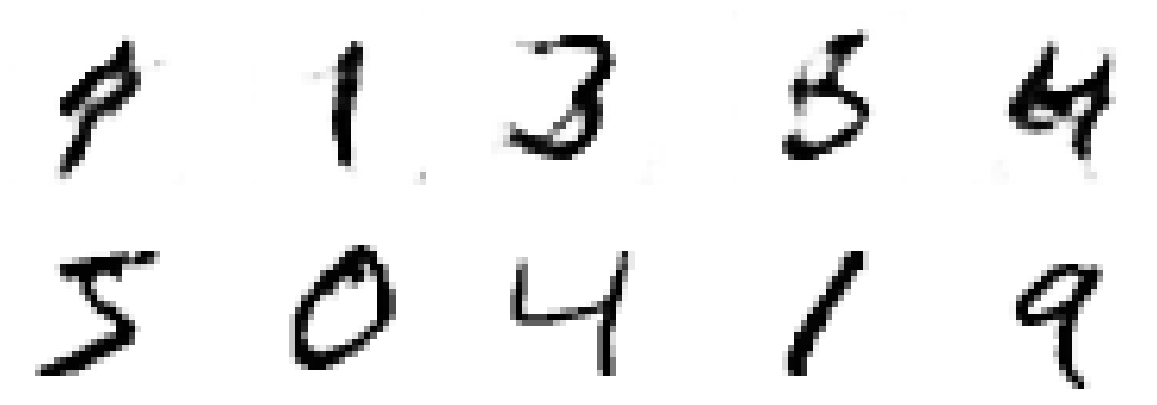

16/16 [==============================] - 0s 3ms/step
D loss: 0.6207981407642365
D accuracy: 0.6669999957084656
G loss: 1.055285930633545


16/16 [==============================] - 0s 2ms/step
D loss: 0.6146401166915894
D accuracy: 0.6739999949932098
G loss: 1.0463250875473022


16/16 [==============================] - 0s 2ms/step
Epoch: 8
16/16 [==============================] - 0s 2ms/step
D loss: 0.5877794027328491
D accuracy: 0.7170000076293945
G loss: 1.0549671649932861




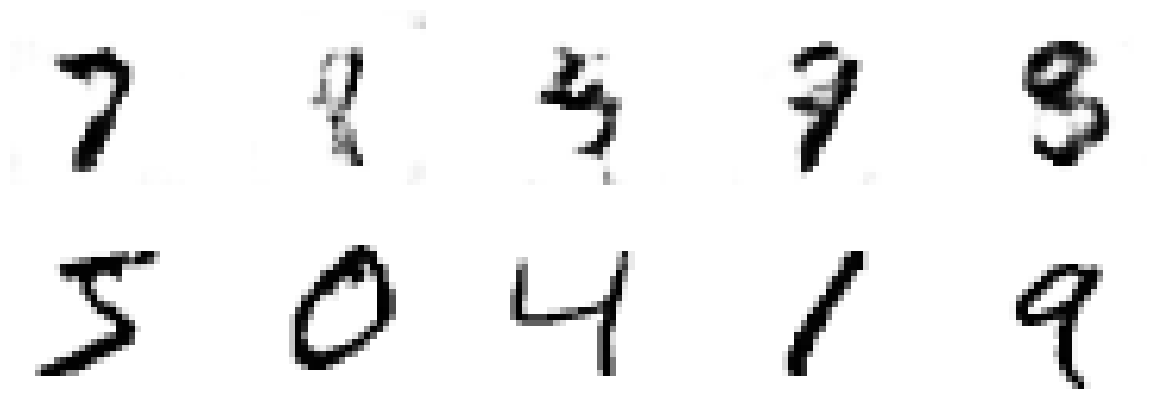

16/16 [==============================] - 0s 2ms/step
D loss: 0.6023294627666473
D accuracy: 0.664000004529953
G loss: 1.1005464792251587


16/16 [==============================] - 0s 2ms/step
D loss: 0.6078247129917145
D accuracy: 0.6820000112056732
G loss: 1.1014151573181152


16/16 [==============================] - 0s 2ms/step
Epoch: 9
16/16 [==============================] - 0s 2ms/step
D loss: 0.5828120708465576
D accuracy: 0.7180000245571136
G loss: 1.130311369895935




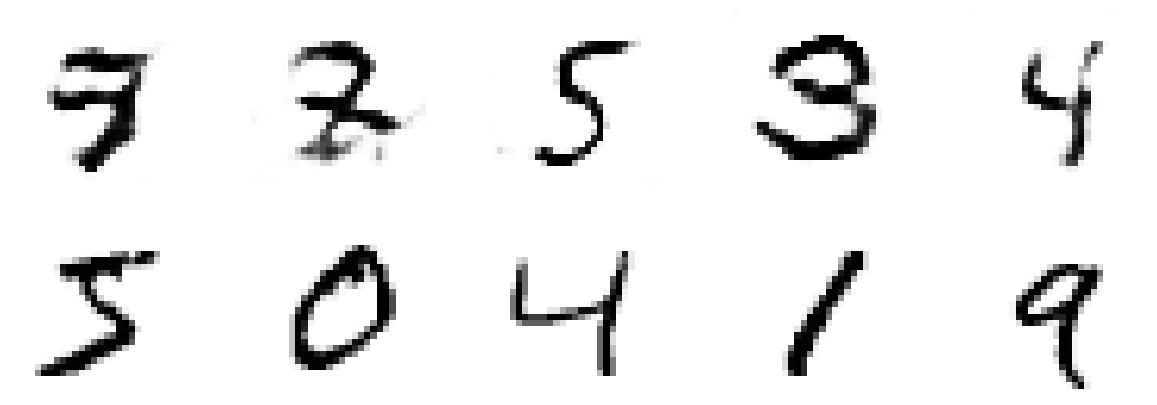

16/16 [==============================] - 0s 3ms/step
D loss: 0.5736641585826874
D accuracy: 0.7290000021457672
G loss: 1.138317584991455


16/16 [==============================] - 0s 2ms/step
D loss: 0.5995683372020721
D accuracy: 0.6840000152587891
G loss: 1.1574815511703491


16/16 [==============================] - 0s 2ms/step


In [16]:
train(X_train, generator_dc, discriminator_dc, combined_dc , epochs=10, batch_size=500, sample_interval=1000)